In [20]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [21]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [22]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [23]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [24]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [25]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

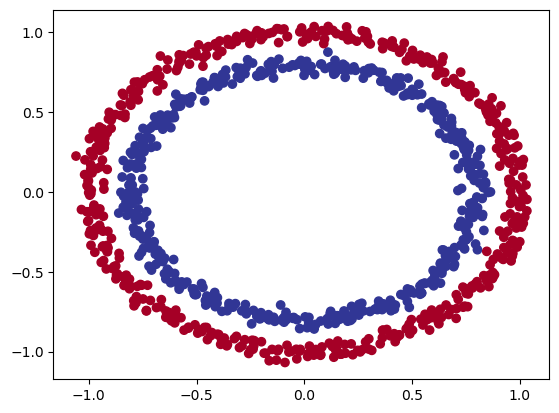

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [27]:
X.shape, y.shape

((1000, 2), (1000,))

In [28]:
len(X), len(y)

(1000, 1000)

In [29]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [30]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.4780 - loss: 6.1825
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.5366 - loss: 5.1139
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5358 - loss: 5.0311
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.5338 - loss: 5.1142
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5203 - loss: 5.6124


In [31]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

In [32]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X,y,epochs=100,verbose=0)

In [33]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.4955 - loss: 0.6932


[0.6932051181793213, 0.5]

#Improving on accuracy

In [34]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)

In [35]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.5094 - loss: 0.6915


[0.6951050162315369, 0.4909999966621399]

In [36]:
import numpy as np

def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
doing binary classifcation...


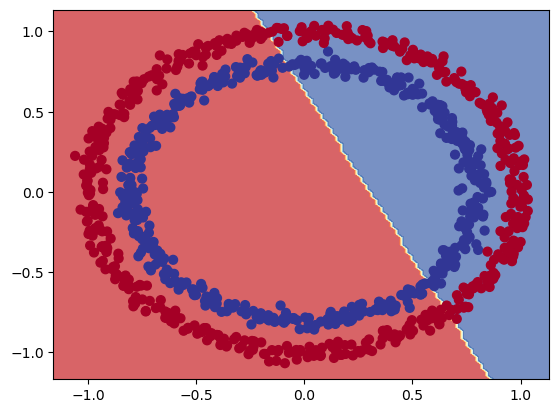

In [37]:
plot_decision_boundary(model_3, X, y)

In [38]:
# tf.random.set_seed(42)
# X_regression = np.arange(0,1000,5)
# y_regression = np.arange(100,1100,5)
# X_reg_train = X_regression[:150]
# X_reg_test = X_regression[150:]
# y_reg_train = y_regression[:150]
# y_reg_test = y_regression[150:]

# model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
#             y_reg_train,
#             epochs=100)

In [39]:
model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [40]:
tf.random.set_seed(42) 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 445.6260 - mae: 445.6260  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 344.0808 - mae: 344.0808 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 240.8626 - mae: 240.8626 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 134.4261 - mae: 134.4261 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.9572 - mae: 45.9572
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.2078 - mae: 77.2078 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 75.9285 - mae: 75.9285 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49.7712 - mae: 49.7712
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.1119 - mae: 45.1119
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.9747 - mae: 42.9747
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.5182 - mae: 42.5182
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.6046 - mae: 43.6046
Epoch 13/100
5/5 ━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


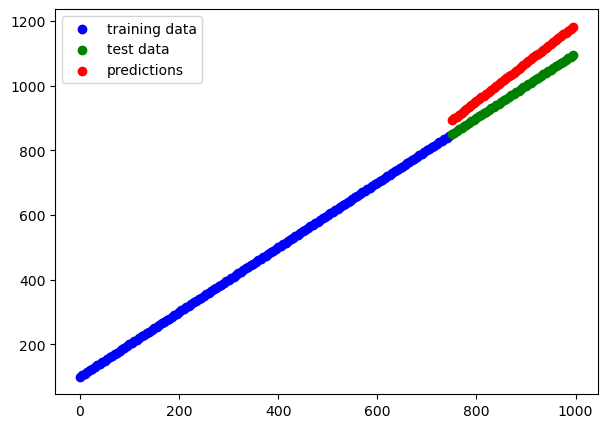

In [41]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(7,5))
plt.scatter(X_reg_train,y_reg_train,c='b',label='training data'),
plt.scatter(X_reg_test,y_reg_test,c='g',label='test data'),
plt.scatter(X_reg_test,y_reg_preds.squeeze(),c='r',label='predictions')
plt.legend()

In [42]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='linear'),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.4537 - loss: 5.2847
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.4382 - loss: 5.0522
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.4386 - loss: 4.9833
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.4382 - loss: 4.9691
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.4356 - loss: 4.9579
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.4377 - loss: 4.9487
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.4376 - loss: 4.9289
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.4389 - loss: 4.8982
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.4413 - loss: 4.8924
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.4419 - loss: 4.8862
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.4403 - loss: 4.8809
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step
doing binary classifcation...


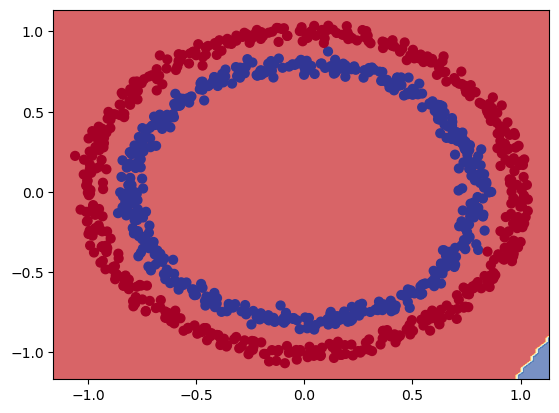

In [43]:
plot_decision_boundary(model_4,X,y)

In [44]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

In [45]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.4826 - loss: 1.3273 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.4295 - loss: 1.0231
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.4064 - loss: 0.9391
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.4221 - loss: 0.8897
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.4306 - loss: 0.8534
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.4297 - loss: 0.8248
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.4218 - loss: 0.8019
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.4119 - loss: 0.7826
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.3686 - loss: 0.7667
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.3245 - loss: 0.7534
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.3150 - loss: 0.7433
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [46]:
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.8525 - loss: 0.3186


[0.3182356357574463, 0.8539999723434448]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
doing binary classifcation...


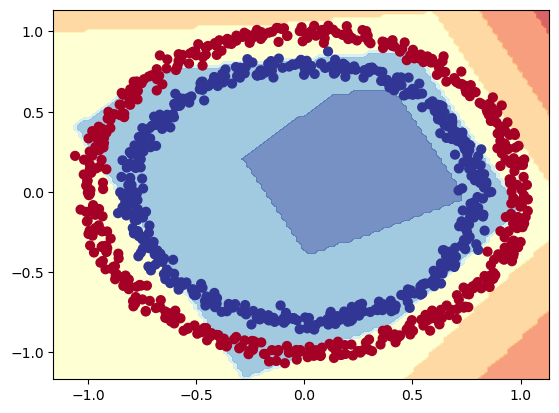

In [47]:
plot_decision_boundary(model_6, X, y)

In [48]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.5171 - loss: 0.7183 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.5008 - loss: 0.7105
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.5070 - loss: 0.7064
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.4887 - loss: 0.7041
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.4830 - loss: 0.7028
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.4142 - loss: 0.7020
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.4109 - loss: 0.7013
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.3930 - loss: 0.7007
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.3895 - loss: 0.7000
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.3690 - loss: 0.6990
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.3684 - loss: 0.6981
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [49]:
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.6226 - loss: 0.6523


[0.655631959438324, 0.6079999804496765]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
doing binary classifcation...


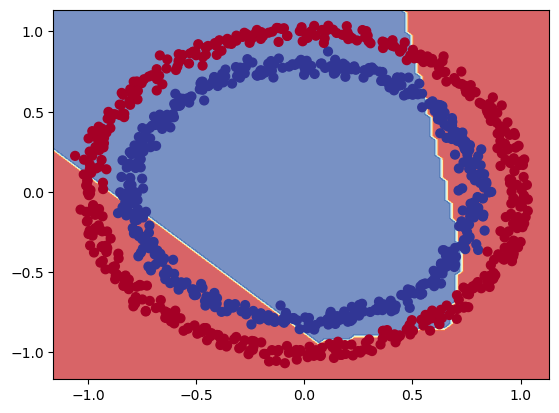

In [50]:
plot_decision_boundary(model_7,X,y)

In [51]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [52]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535017e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

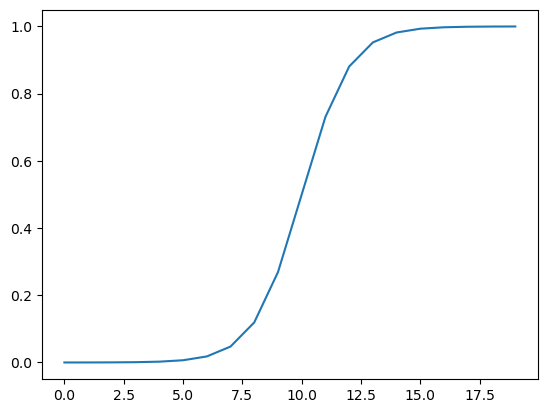

In [53]:
plt.plot(sigmoid(A))

In [54]:
def relu(x):
    return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

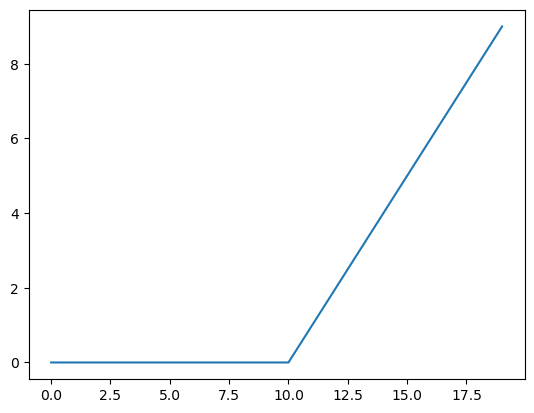

In [55]:
plt.plot(relu(A))

In [56]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [57]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [58]:
len(X)

1000

In [59]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [60]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_8.fit(X_train,y_train,epochs=25, verbose=False)

In [61]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f'Loss of model is {loss}')
print(f'Accuracy of model is {accuracy*100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9698 - loss: 0.1107 
Loss of model is 0.1094750314950943
Accuracy of model is 97.00%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
doing binary classifcation...


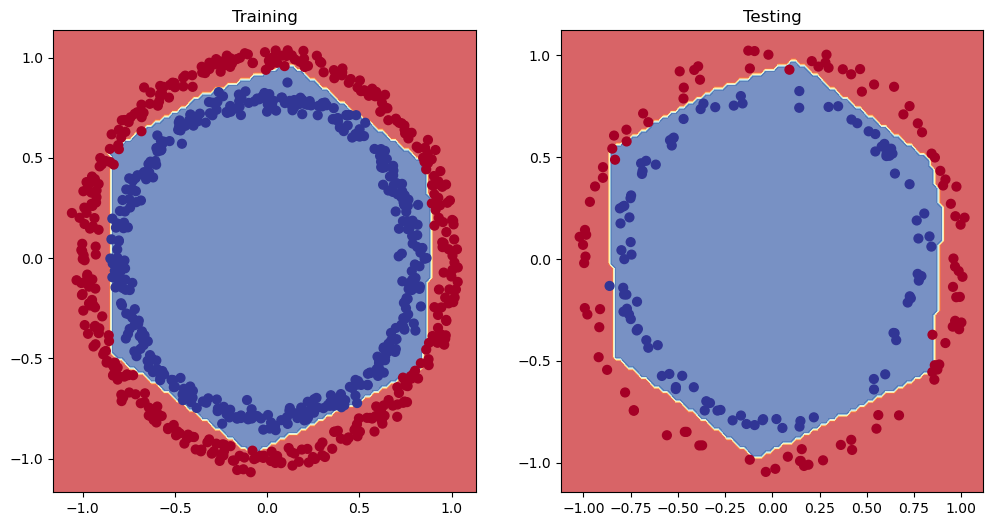

In [62]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plot_decision_boundary(model_8,X_test,y_test)
plt.show()

Text(0.5, 1.0, 'Model 8 loss and accuracy')

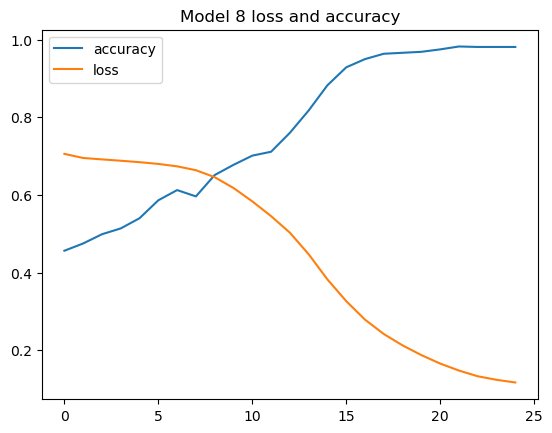

In [63]:
pd.DataFrame(history.history).plot()
plt.title('Model 8 loss and accuracy')

In [64]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.5121 - loss: 0.6919 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.5121 - loss: 0.6918 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.5118 - loss: 0.6917 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.5118 - loss: 0.6916 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.5126 - loss: 0.6915 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.5224 - loss: 0.6914 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.5259 - loss: 0.6912 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.5203 - loss: 0.6911 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.5184 - loss: 

<Axes: xlabel='epochs'>

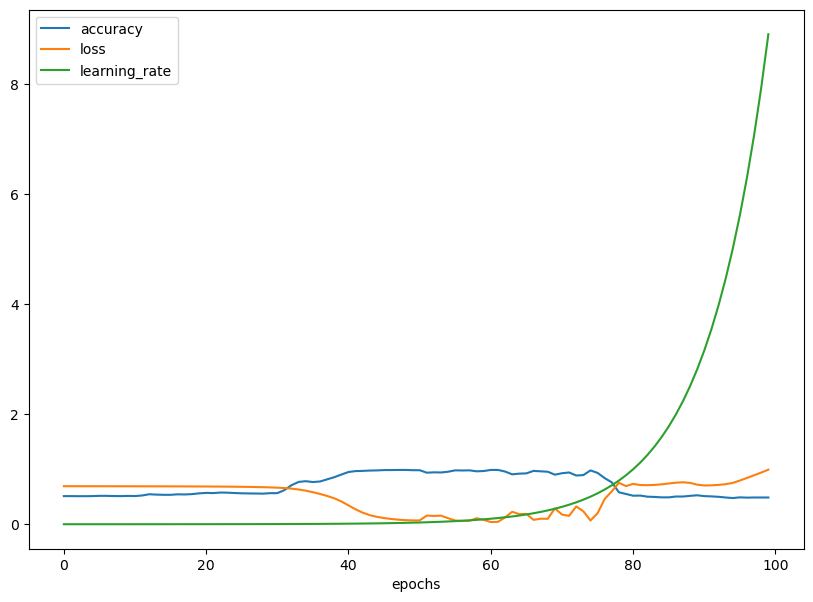

In [65]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs loss')

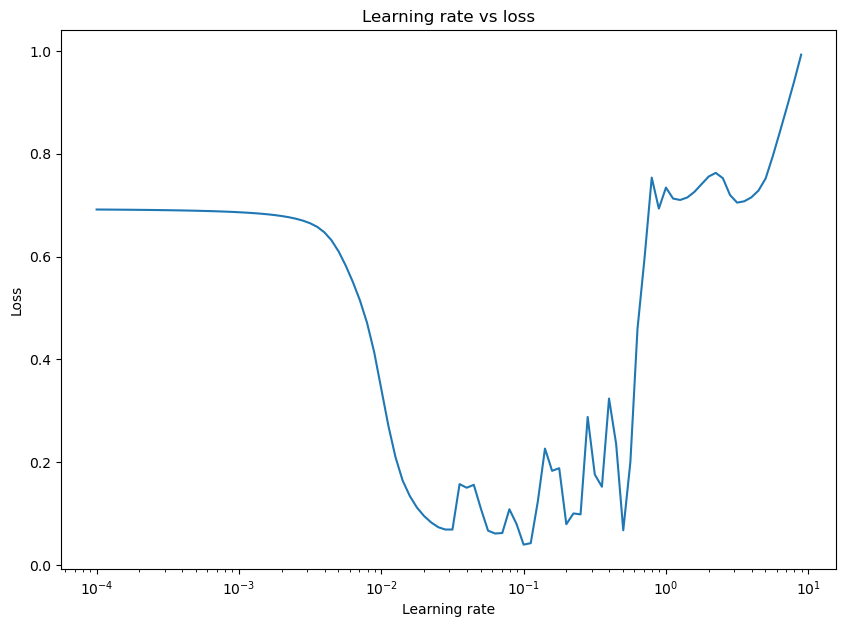

In [66]:
lrs = 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs loss')

In [67]:
#taking learning rate as 0.02
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_10.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

history = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.4459 - loss: 0.7241
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.5024 - loss: 0.6912
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.5544 - loss: 0.6812
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.5839 - loss: 0.6644
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.6202 - loss: 0.6396
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.7086 - loss: 0.5877
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.7198 - loss: 0.5328
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.7812 - loss: 0.4829
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.8071 - loss: 0.4468
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.8163 - loss: 0.4193
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8253 - loss: 0.3997
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step -

In [68]:
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8959 - loss: 0.2903 


[0.304345965385437, 0.875]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
doing binary classifcation...


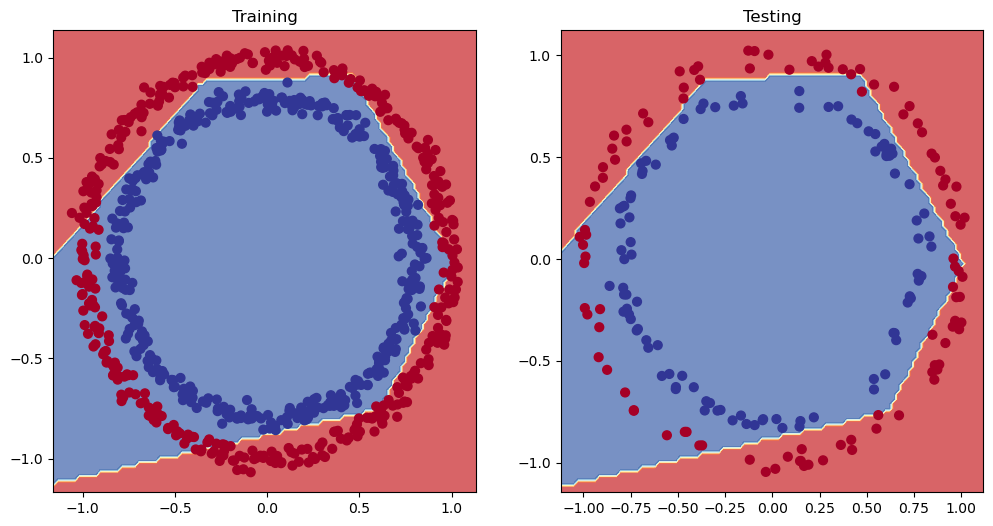

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plot_decision_boundary(model_10,X_test,y_test)  
plt.show()

In [70]:
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)
confusion_matrix(y_test,tf.round(y_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[76, 25],
       [ 0, 99]])

## Multiclass classification

In [72]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [73]:
#Show the first training example
print(f'Training example: \n{train_data[0]}\n')
print(f'Testing example: \n{test_data[0]}\n')

Training example: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [74]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [76]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

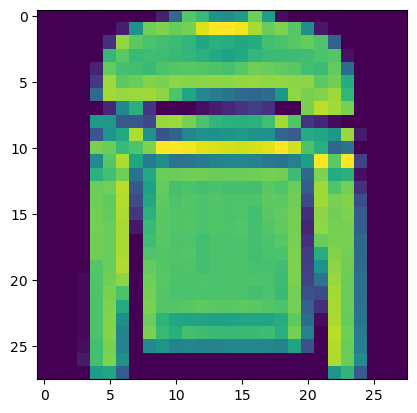

In [77]:
plt.imshow(train_data[5])

In [79]:
train_labels[5]

2

In [80]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Pullover')

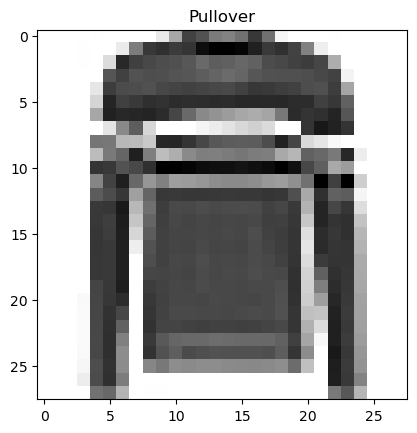

In [83]:
plt.imshow(train_data[5], cmap=plt.cm.binary)
plt.title(class_names[train_labels[5]])

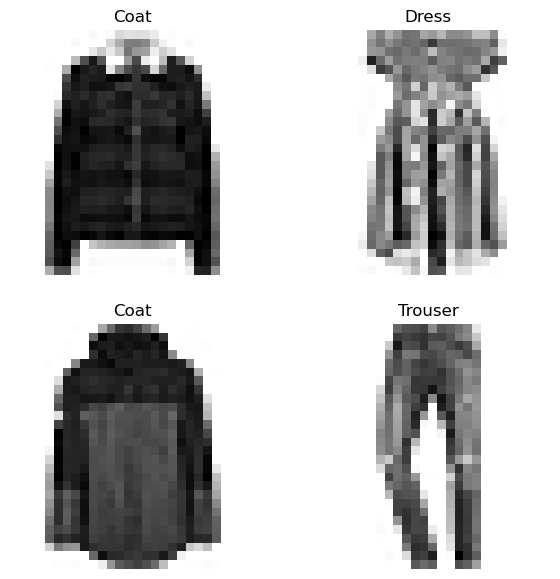

In [84]:
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = np.random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [86]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy']
                 )

non_norm_history = model_11.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 481us/step - accuracy: 0.0986 - loss: 2.8836 - val_accuracy: 0.1001 - val_loss: 2.3025
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - accuracy: 0.0987 - loss: 2.3029 - val_accuracy: 0.1001 - val_loss: 2.3025
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - accuracy: 0.0994 - loss: 2.3016 - val_accuracy: 0.1031 - val_loss: 2.2962
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.1106 - loss: 2.2822 - val_accuracy: 0.1152 - val_loss: 2.2675
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.1220 - loss: 2.2532 - val_accuracy: 0.1339 - val_loss: 2.2294
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - accuracy: 0.1352 - loss: 2.2278 - val_accuracy: 0.1455 - val_loss: 2.2051
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - accuracy: 0.1501 - loss: 2.1831 - val_accuracy: 0.2379 - val_loss: 1.8555
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - accuracy: 0.2261 -

In [87]:
model_11.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)